1. Задание.
    - Для реализованной в методичке модели градиентного бустинга построить зависимости ошибки от количества деревьев при разных значениях шага градиента на одном графике и для разной глубины деревьев на другом. 
    - Сделать выводы о зависимости ошибки от этих гиперпараметров (шаг градиента, максимальная глубина деревьев, количество деревьев). 
    - Подобрать оптимальные значения этих гиперпараметров (минимум ошибки на тесте при отсутствии переобучения).

In [10]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([
        eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) 
                     for x in X])

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction) ** 2)) / len(y_real)

In [6]:
def bias(y, z):
    return - 2 * (z - y)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
   
    trees = []

    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        if len(trees) == 0:
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:

            z_train = gb_predict(X_train, trees, coefs, eta)

            tree.fit(X_train, bias(y_train, z_train))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):

    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {round(mean_squared_error(y_train, train_prediction))}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {round(mean_squared_error(y_test, test_prediction))}')

In [17]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [22]:
n_trees = 10
coefs = [1] * n_trees
max_depth = 1
eta = 0.5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [23]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 1     с шагом 0.5 на тренировочной выборке: 2744
Ошибка алгоритма из 10 деревьев глубиной 1     с шагом 0.5 на тестовой выборке: 3032


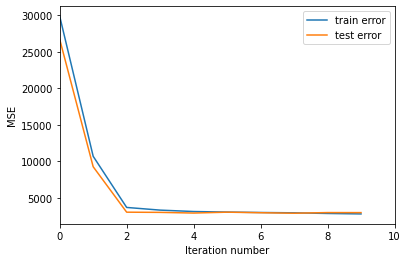

In [24]:
get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 10 деревьев глубиной 2     с шагом 0.5 на тренировочной выборке: 1916
Ошибка алгоритма из 10 деревьев глубиной 2     с шагом 0.5 на тестовой выборке: 3731


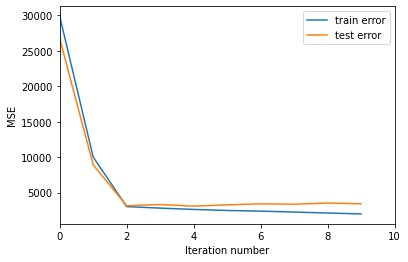

In [25]:
n_trees = 10
coefs = [1] * n_trees
max_depth = 2
eta = 0.5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 1095
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 4845


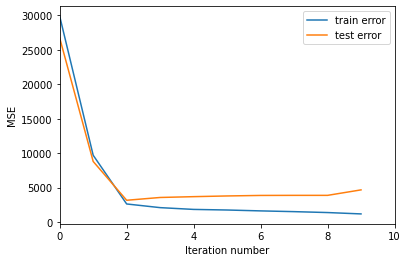

In [26]:
n_trees = 10
coefs = [1] * n_trees
max_depth = 3
eta = 0.5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 10 деревьев глубиной 4     с шагом 0.5 на тренировочной выборке: 514
Ошибка алгоритма из 10 деревьев глубиной 4     с шагом 0.5 на тестовой выборке: 5111


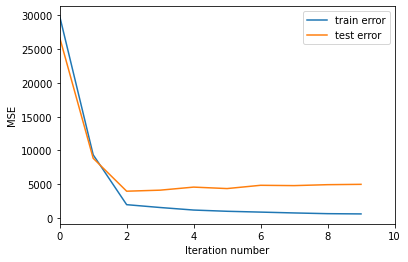

In [28]:
n_trees = 10
coefs = [1] * n_trees
max_depth = 4
eta = 0.5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 10 деревьев глубиной 1     с шагом 0.3 на тренировочной выборке: 2764
Ошибка алгоритма из 10 деревьев глубиной 1     с шагом 0.3 на тестовой выборке: 2885


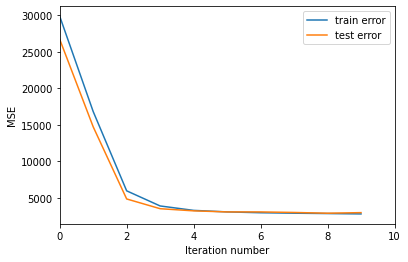

In [29]:
n_trees = 10
coefs = [1] * n_trees
max_depth = 1
eta = 0.3

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 10 деревьев глубиной 2     с шагом 0.4 на тренировочной выборке: 1885
Ошибка алгоритма из 10 деревьев глубиной 2     с шагом 0.4 на тестовой выборке: 3791


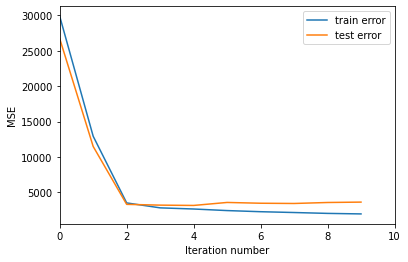

In [30]:
n_trees = 10
coefs = [1] * n_trees
max_depth = 2
eta = 0.4

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 15 деревьев глубиной 1     с шагом 0.3 на тренировочной выборке: 2583
Ошибка алгоритма из 15 деревьев глубиной 1     с шагом 0.3 на тестовой выборке: 2804


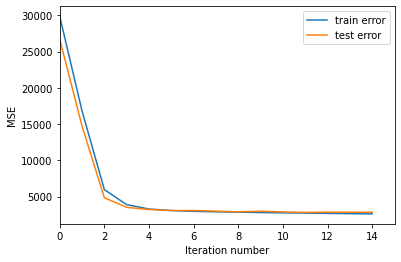

In [31]:
n_trees = 15
coefs = [1] * n_trees
max_depth = 1
eta = 0.3

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 25 деревьев глубиной 1     с шагом 0.3 на тренировочной выборке: 2354
Ошибка алгоритма из 25 деревьев глубиной 1     с шагом 0.3 на тестовой выборке: 2836


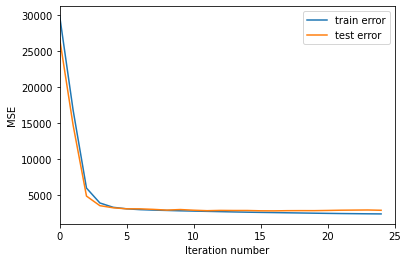

In [33]:
n_trees = 25
coefs = [1] * n_trees
max_depth = 1
eta = 0.3

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)

Можно сделать вывод, что наилучшими параметрами будут n_trees = 10, eta=0.3 и depth = 1

In [34]:
n_trees = 10
coefs = [1] * n_trees
max_depth = 1
eta = 0.3

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 1     с шагом 0.3 на тренировочной выборке: 2764
Ошибка алгоритма из 10 деревьев глубиной 1     с шагом 0.3 на тестовой выборке: 2885
